<a href="https://colab.research.google.com/github/aman20119/stock_market_prediction/blob/master/email_spam_and_character_recognition_and_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description :  This project is for detecting the email if it is spam (spam) or not (ham)

In [0]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [0]:
# read data
df = pd.read_csv('spam.csv')
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.shape

(5572, 2)

In [0]:
df.columns

Index(['Label', 'EmailText'], dtype='object')

In [0]:
df["Label"]= df["Label"].replace("spam", 1)

In [0]:
df["Label"]= df["Label"].replace("ham", 0)

In [0]:
df = df[['EmailText','Label']]

In [0]:
df.head()

,EmailText,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
#check for duplicates and remove them
df.drop_duplicates(inplace = True)

In [0]:
df.shape

(5169, 2)

In [0]:
#show the number of missing data
df.isnull().sum()

EmailText    0
Label        0
dtype: int64

In [0]:
#Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def process_text(text):
  #1 remove punctuation
  #2 remove stop words
  #3 return a list of clean text words

  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return clean_words



In [0]:
#show the tokenization
df['EmailText'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

In [0]:
# convert the collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_text).fit_transform(df['EmailText'])

In [0]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['Label'], test_size= 0.20, random_state = 0)

In [0]:
# get the shape of messages_bow
messages_bow.shape

(5169, 11304)

In [0]:
#create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [0]:
#print the predictions
print(classifier.predict(X_train))

#print actual values
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [0]:
#Evaluate the model on trainning data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix: 
 [[3623    8]
 [  11  493]]

Accuracy:  0.9954050785973397


In [0]:
#test data
#print the predictions
print(classifier.predict(X_test))

#print actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [0]:
#Evaluate the model on testing data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix: 
 [[850  35]
 [ 11 138]]

Accuracy:  0.9555125725338491


## stock prediction





In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-10', end='2019-12-17')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-10,60.857143,60.214287,60.844284,60.462856,64549100.0,52.342537
2012-01-11,60.407143,59.901428,60.382858,60.364285,53771200.0,52.257195
2012-01-12,60.414288,59.821430,60.325714,60.198570,53146800.0,52.113747
2012-01-13,60.064285,59.808571,59.957142,59.972858,56505400.0,51.918343
2012-01-17,60.855713,60.422855,60.599998,60.671429,60724300.0,52.523098
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [0]:
#number of rows and columns
df.shape

(1998, 6)

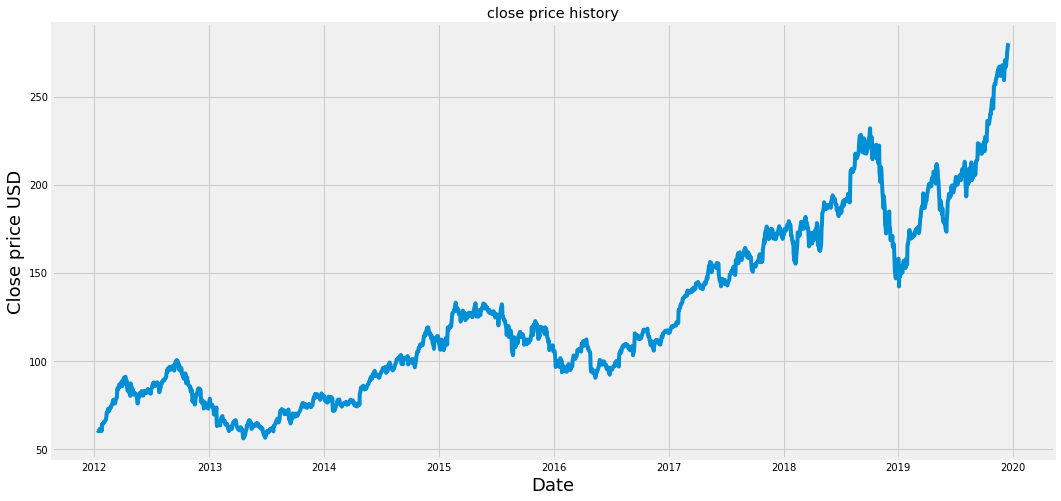

In [0]:
#visualize the data
plt.figure(figsize=(16, 8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD', fontsize= 18)
plt.show()

In [0]:
#create a new dataframe having Close column only
data = df.filter(['Close'])
#convert dataframe to numpy array
dataset = data.values
#no of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1599

In [0]:
#scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02080338],
       [0.02036454],
       [0.01962679],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [0]:
#create the training data set
#create the scaled train data set
train_data = scaled_data[0: training_data_len ,  :]
#split the data into X_train and Y_train

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if(i<= 61):
    print(x_train)
    print(y_train)
    print()

[array([0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284])]
[0.1546421054194005]

[array([0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.036

In [0]:
#convert x_train and y_train in numpy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1539, 60, 1)

In [0]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1539/1539 [==============================] - 59s 39ms/step - loss: 8.4467e-04


In [0]:
#create the testing data set
#creste a new array
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert the data into numpy array
x_test = np.array(x_test)

In [0]:
#reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(399, 60, 1)

In [0]:
#Get the modeel predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root  mean squared 
rmse = np.sqrt( np.mean( predictions - y_test) ** 2)
rmse

10.464293362801534

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


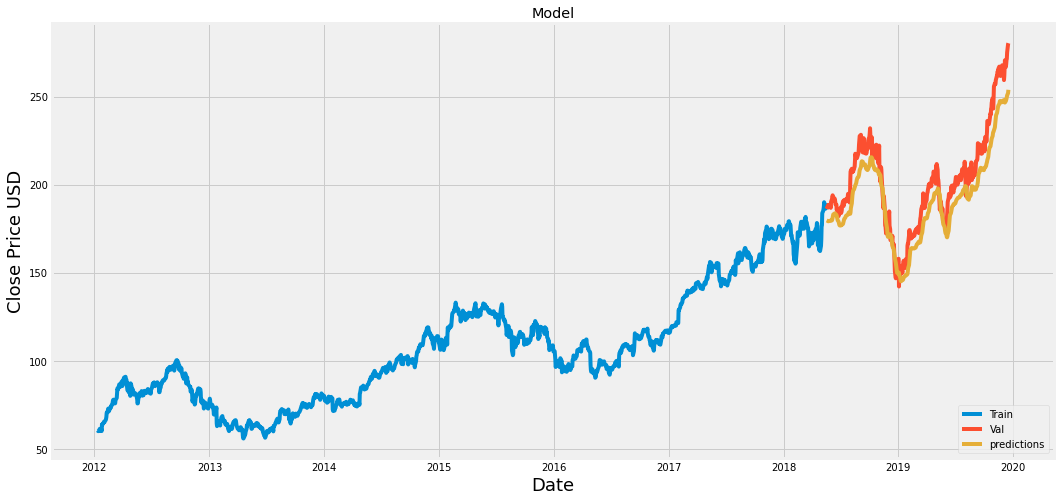

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [0]:
#show the valid and predicted price
valid

,Close,predictions
Date,,
2018-05-18,186.309998,179.696289
2018-05-21,187.630005,179.488235
2018-05-22,187.160004,179.363998
2018-05-23,188.360001,179.228729
2018-05-24,188.149994,179.266754
...,...,...
2019-12-11,270.769989,248.899353
2019-12-12,271.459991,249.808105
2019-12-13,275.149994,250.750351


In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-10', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price and convert in array
last_60_days = new_df[-60:].values
#scaled the data
last_60_days_scaled = scaler.transform(last_60_days)
#crestw a empty list
X_test = []
#append the last 60 days data
X_test.append(last_60_days_scaled)
#Convert it to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[255.8037]]


In [0]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-20')             #for more future pricdions change end date and start date
print(apple_quote2['Close'])

Date
2019-12-18    279.739990
2019-12-19    280.019989
2019-12-20    279.440002
Name: Close, dtype: float64
